# OCTMNIST Classification

# Step 1: Loading the dataset and preparing for training

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import medmnist
from medmnist import OCTMNIST
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = OCTMNIST(split='train', transform=transform, download=True)
val_dataset = OCTMNIST(split='val', transform=transform, download=True)
test_dataset = OCTMNIST(split='test', transform=transform, download=True)

print("Dataset successfully loaded!")

100%|██████████| 54.9M/54.9M [00:57<00:00, 954kB/s] 


Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz
Dataset successfully loaded!


In [ ]:
import numpy as np
from collections import Counter

train_labels = np.array([train_dataset[i][1] for i in range(len(train_dataset))]).flatten()
val_labels = np.array([val_dataset[i][1] for i in range(len(val_dataset))]).flatten()
test_labels = np.array([test_dataset[i][1] for i in range(len(test_dataset))]).flatten()

num_classes = len(np.unique(train_labels))

image_shape = train_dataset[0][0].shape

train_class_counts = Counter(train_labels)
val_class_counts = Counter(val_labels)
test_class_counts = Counter(test_labels)

all_pixels = np.array([train_dataset[i][0].numpy().flatten() for i in range(1000)]).flatten()
pixel_mean = np.mean(all_pixels)
pixel_std = np.std(all_pixels)
pixel_min = np.min(all_pixels)
pixel_max = np.max(all_pixels)

print(f"Number of Classes: {num_classes}")
print(f"Image Shape: {image_shape}")
print("\nClass Distribution in Training Data:", train_class_counts)
print("Class Distribution in Validation Data:", val_class_counts)
print("Class Distribution in Test Data:", test_class_counts)

print("\nPixel Intensity Statistics:")
print(f"Mean: {pixel_mean:.4f}")
print(f"Standard Deviation: {pixel_std:.4f}")
print(f"Min Pixel Value: {pixel_min}")
print(f"Max Pixel Value: {pixel_max}")

Number of Classes: 4
Image Shape: torch.Size([1, 28, 28])

Class Distribution in Training Data: Counter({3: 46026, 0: 33484, 1: 10213, 2: 7754})
Class Distribution in Validation Data: Counter({3: 5114, 0: 3721, 1: 1135, 2: 862})
Class Distribution in Test Data: Counter({3: 250, 2: 250, 0: 250, 1: 250})

Pixel Intensity Statistics:
Mean: -0.6283
Standard Deviation: 0.3844
Min Pixel Value: -1.0
Max Pixel Value: 1.0


Data Visualization

Sample Images

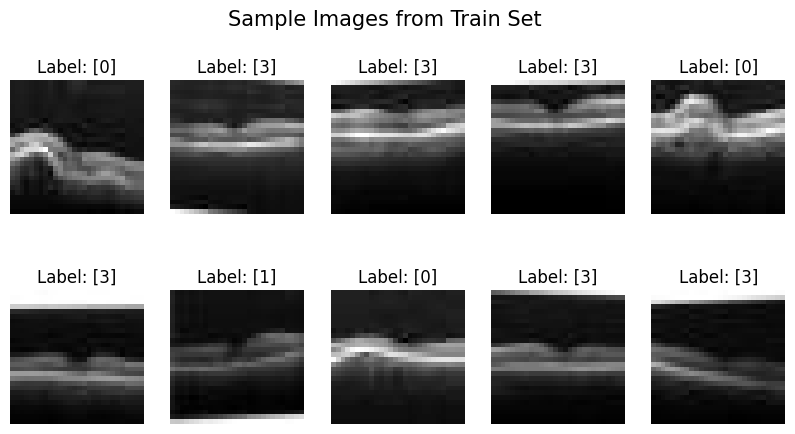

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def show_samples(dataset, title):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    fig.suptitle(title, fontsize=15)
    for i, ax in enumerate(axes.flat):
        image, label = dataset[i]
        ax.imshow(image.squeeze(), cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis("off")
    plt.show()

show_samples(train_dataset, "Sample Images from Train Set")

Class Distribution Histogram

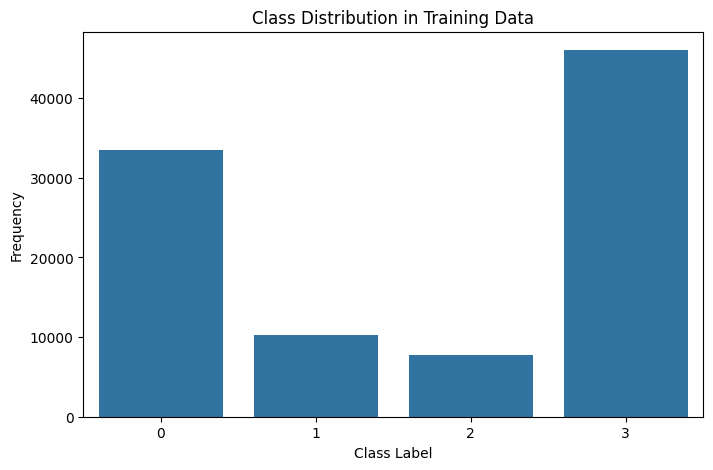

In [ ]:
train_class_counts = Counter(train_labels)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()))
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Data")
plt.show()

Pixel Intensity Histogram

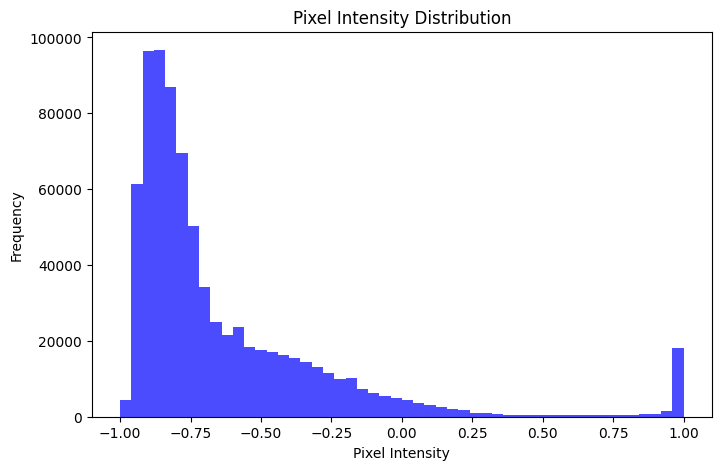

In [ ]:
all_pixels = np.array([train_dataset[i][0].numpy().flatten() for i in range(1000)]).flatten()
plt.figure(figsize=(8, 5))
plt.hist(all_pixels, bins=50, color='blue', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

Pixel Correlation Matrix

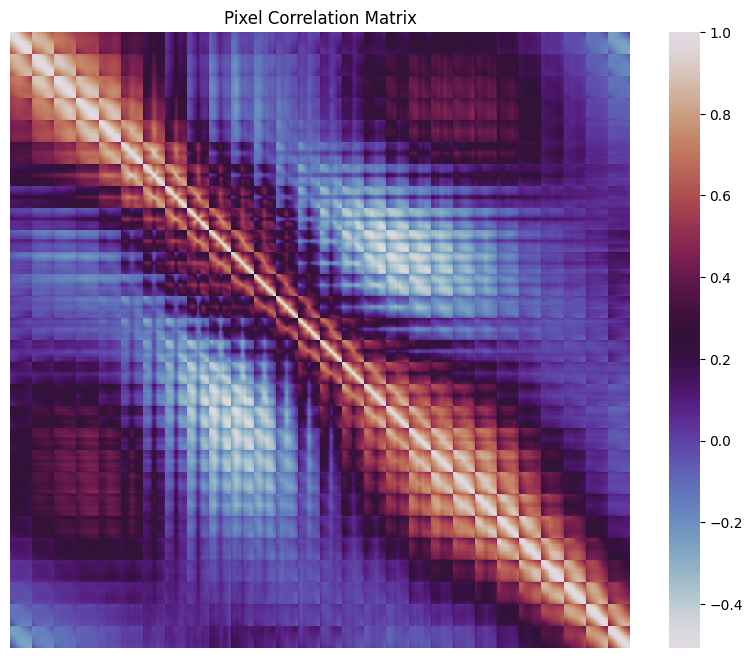

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_samples = 1000
image_size = 28 * 28

image_data = np.array([train_dataset[i][0].numpy().flatten() for i in range(num_samples)])

corr_matrix = np.corrcoef(image_data, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="twilight", xticklabels=False, yticklabels=False)
plt.title("Pixel Correlation Matrix")
plt.show()


Data preprocessing

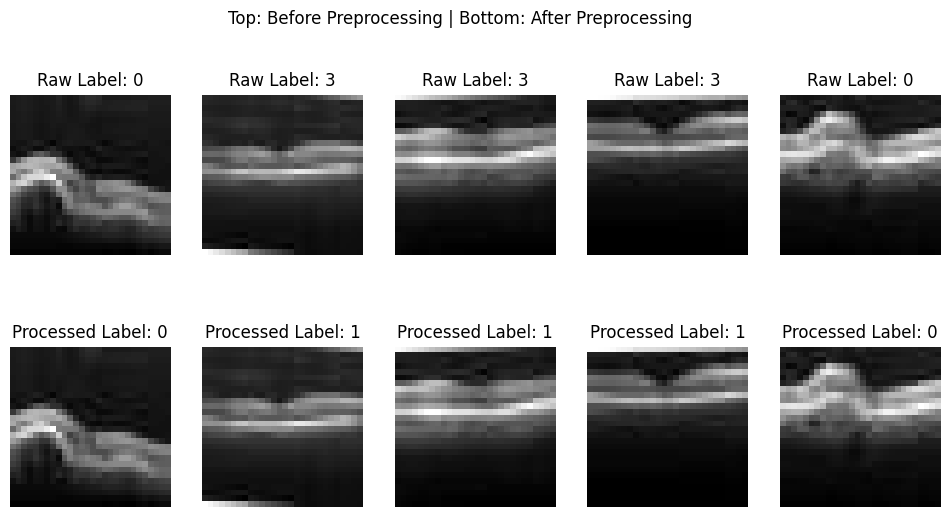


First Image Before Preprocessing (Raw Pixel Values):
[[[-0.81960785 -0.8117647  -0.8039216  -0.8117647  -0.827451
   -0.8352941  -0.827451   -0.81960785 -0.7882353  -0.827451
   -0.84313726 -0.827451   -0.77254903 -0.7411765  -0.7411765
   -0.75686276 -0.827451   -0.827451   -0.827451   -0.81960785
   -0.81960785 -0.8117647  -0.8117647  -0.8117647  -0.8039216
   -0.8039216  -0.8039216  -0.8039216 ]
  [-0.81960785 -0.8117647  -0.8039216  -0.8117647  -0.827451
   -0.8352941  -0.827451   -0.81960785 -0.79607844 -0.827451
   -0.84313726 -0.827451   -0.78039217 -0.75686276 -0.75686276
   -0.77254903 -0.8039216  -0.8039216  -0.79607844 -0.79607844
   -0.79607844 -0.7882353  -0.7882353  -0.7882353  -0.8039216
   -0.8039216  -0.8039216  -0.8039216 ]
  [-0.827451   -0.8117647  -0.8039216  -0.8117647  -0.827451
   -0.8352941  -0.8352941  -0.81960785 -0.8039216  -0.827451
   -0.84313726 -0.8352941  -0.8039216  -0.78039217 -0.7882353
   -0.8039216  -0.8039216  -0.79607844 -0.79607844 -0.79607844


In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

def preprocess_dataset(dataset):
    images = torch.stack([dataset[i][0] for i in range(len(dataset))])
    labels = np.array([dataset[i][1].item() for i in range(len(dataset))])

    images = (images + 1) / 2

    encoder = OneHotEncoder(sparse_output=False)
    labels_one_hot = encoder.fit_transform(labels.reshape(-1, 1))

    return images, labels_one_hot

images, labels_one_hot = preprocess_dataset(train_dataset)

def sample_data_before_after(dataset, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(12, 6))
    raw_images = [dataset[i][0] for i in range(num_samples)]
    raw_labels = [dataset[i][1].item() for i in range(num_samples)]
    processed_images = [(img + 1) / 2 for img in raw_images]
    encoder = OneHotEncoder(sparse_output=False)
    raw_labels_np = np.array(raw_labels).reshape(-1, 1)
    processed_labels = encoder.fit_transform(raw_labels_np)

    for i in range(num_samples):
        img = raw_images[i].squeeze(0)
        axes[0, i].imshow(img, cmap="gray")
        axes[0, i].set_title(f"Raw Label: {raw_labels[i]}")
        axes[0, i].axis("off")

    for i in range(num_samples):
        img = processed_images[i].squeeze(0)
        axes[1, i].imshow(img, cmap="gray")
        axes[1, i].set_title(f"Processed Label: {np.argmax(processed_labels[i])}")
        axes[1, i].axis("off")

    plt.suptitle("Top: Before Preprocessing | Bottom: After Preprocessing", fontsize=12)
    plt.show()

    print("\nFirst Image Before Preprocessing (Raw Pixel Values):")
    print(raw_images[0].numpy())

    print("\nFirst Image After Preprocessing (Normalized Pixel Values):")
    print(processed_images[0].numpy())

    print("\nFirst Label Before Preprocessing:")
    print(raw_labels[0])

    print("\nFirst Label After One-Hot Encoding:")
    print(processed_labels[0])

sample_data_before_after(train_dataset)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val_tensor), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test_tensor), batch_size=batch_size, shuffle=False)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 68233
Validation set size: 14622
Test set size: 14622


# Step 3: Defining the Neural Network

In [ ]:
import torch.nn as nn
!pip install torchinfo
from torchinfo import summary
import torch.nn.functional as F

class OCTCNN(nn.Module):
    def __init__(self):
        super(OCTCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        dummy_input = torch.zeros(1, 1, 28, 28)
        with torch.no_grad():
            out = self.pool(F.relu(self.conv1(dummy_input)))
            out = self.pool(F.relu(self.conv2(out)))
            flatten_size = out.view(1, -1).shape[1]

        self.fc1 = nn.Linear(flatten_size, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = OCTCNN()
summary(model)

Layer (type:depth-idx)                   Param #
OCTCNN                                   --
├─Conv2d: 1-1                            320
├─Conv2d: 1-2                            18,496
├─MaxPool2d: 1-3                         --
├─Linear: 1-4                            401,536
├─Linear: 1-5                            1,290
├─Dropout: 1-6                           --
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0

# Step 4: Training the Neural Network

In [ ]:
import torch.optim as optim
import time

train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_train_acc, best_val_acc, best_test_acc = 0, 0, 0
best_train_epoch, best_val_epoch, best_test_epoch = 0, 0, 0

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss, correct_train, total_train = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, torch.argmax(labels, dim=1))
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_train += (preds == torch.argmax(labels, dim=1)).sum().item()
        total_train += labels.shape[0]

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100

    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss += loss_function(val_outputs, val_labels.argmax(dim=1)).item()

            preds_val = torch.argmax(val_outputs, dim=1)
            correct_val += (preds_val == torch.argmax(val_labels, dim=1)).sum().item()
            total_val += val_labels.shape[0]

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = (correct_val / total_val) * 100

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    test_loss, correct_test, total_test = 0.0, 0, 0

    with torch.no_grad():
      for test_inputs, test_labels in test_loader:
          test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

          test_outputs = model(test_inputs)
          test_loss += loss_function(test_outputs, test_labels.argmax(dim=1)).item()

          preds_test = torch.argmax(test_outputs, dim=1)
          correct_test += (preds_test == test_labels.argmax(dim=1)).sum().item()
          total_test += test_labels.shape[0]

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = (correct_test / total_test) * 100

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}% - "
          f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}% - "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    if train_accuracy > best_train_acc:
        best_train_acc, best_train_epoch = train_accuracy, epoch + 1
    if val_accuracy > best_val_acc:
        best_val_acc, best_val_epoch = val_accuracy, epoch + 1
    if test_accuracy > best_test_acc:
        best_test_acc, best_test_epoch = test_accuracy, epoch + 1

end_time = time.time()
print(f"Total Training Time: {end_time - start_time:.2f} seconds")

print(f"Highest Training Accuracy: {best_train_acc:.2f}% (Epoch {best_train_epoch})")
print(f"Highest Validation Accuracy: {best_val_acc:.2f}% (Epoch {best_val_epoch})")
print(f"Highest Test Accuracy: {best_test_acc:.2f}% (Epoch {best_test_epoch})")

torch.save(model.state_dict(), "a0_part_3_babynain_1.pt")
print("Model saved as a0_part_3_babynain_1.pt")

Epoch 1/10 - Training Loss: 0.7976, Training Accuracy: 71.16% - Validation Loss: 0.6160, Validation Accuracy: 78.18% - Test Loss: 0.6218, Test Accuracy: 78.25%
Epoch 2/10 - Training Loss: 0.5758, Training Accuracy: 80.13% - Validation Loss: 0.4762, Validation Accuracy: 83.00% - Test Loss: 0.4839, Test Accuracy: 82.76%
Epoch 3/10 - Training Loss: 0.5013, Training Accuracy: 82.72% - Validation Loss: 0.4390, Validation Accuracy: 84.11% - Test Loss: 0.4451, Test Accuracy: 84.19%
Epoch 4/10 - Training Loss: 0.4551, Training Accuracy: 84.11% - Validation Loss: 0.4228, Validation Accuracy: 84.76% - Test Loss: 0.4285, Test Accuracy: 84.61%
Epoch 5/10 - Training Loss: 0.4267, Training Accuracy: 85.24% - Validation Loss: 0.3772, Validation Accuracy: 86.32% - Test Loss: 0.3862, Test Accuracy: 86.25%
Epoch 6/10 - Training Loss: 0.4025, Training Accuracy: 86.04% - Validation Loss: 0.3681, Validation Accuracy: 86.99% - Test Loss: 0.3732, Test Accuracy: 86.77%
Epoch 7/10 - Training Loss: 0.3825, Trai

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.argmax(dim=1).cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds) * 100
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1

test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(model, test_loader)


Test Accuracy: 88.10%
Precision: 0.8672
Recall: 0.8810
F1 Score: 0.8689


Confusion Matrix

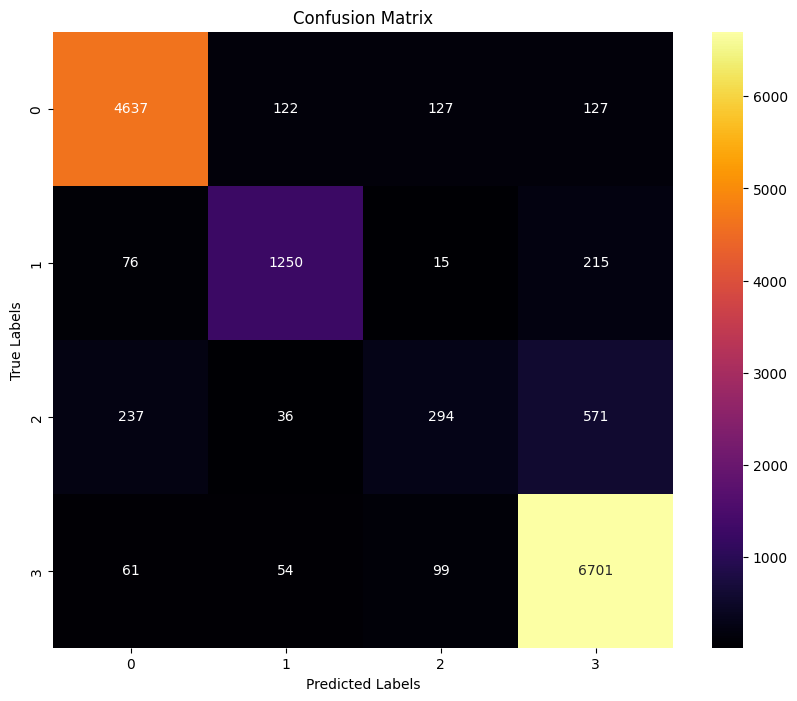

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_loader, class_names=None):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.argmax(dim=1).cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    if class_names is None:
        class_names = [str(i) for i in range(len(cm))]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="inferno", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(model, test_loader)

ROC Curve

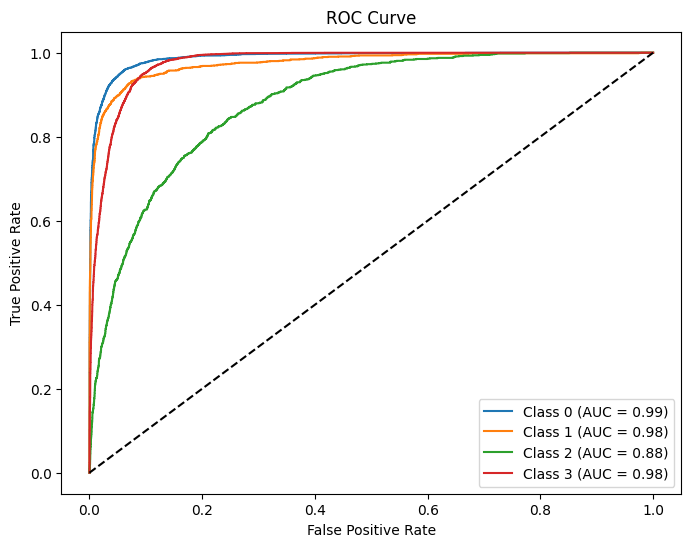

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def plot_roc_curve(model, test_loader):
    model.eval()
    all_probs, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1).cpu().numpy()
            labels = labels.cpu().numpy()

            all_probs.append(probs)
            all_labels.append(labels)

    all_probs = np.vstack(all_probs)
    all_labels = np.vstack(all_labels)

    num_classes = all_labels.shape[1]

    plt.figure(figsize=(8, 6))

    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(all_labels[:, i], all_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(model, test_loader)

Training, Validation, and Test Accuracy Graph

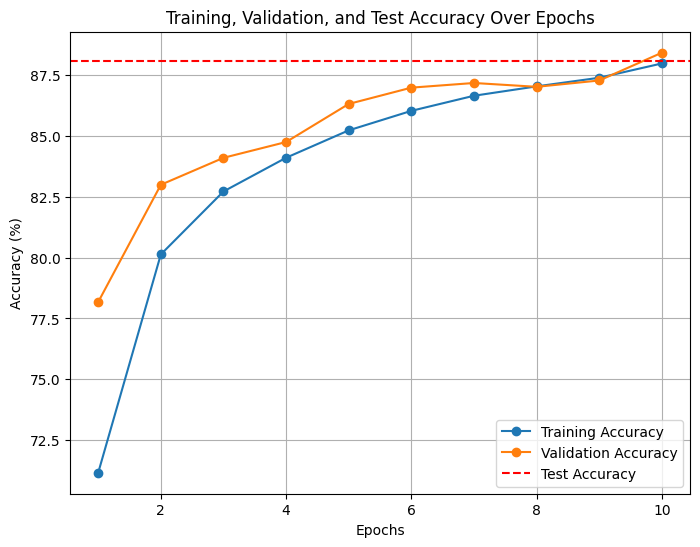

In [ ]:
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy", marker="o")
plt.axhline(y=test_accuracy, color='r', linestyle='--', label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training, Validation, and Test Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


Training, Validation, and Test Loss Graph

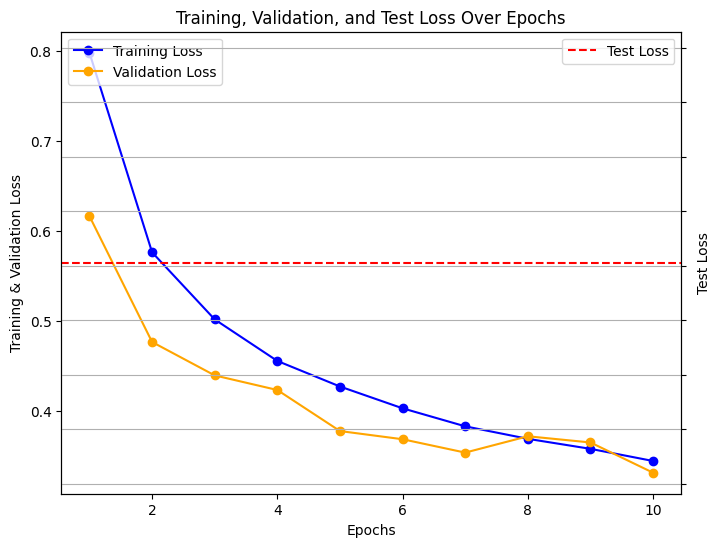

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(epochs_range, train_losses, label="Training Loss", marker="o", color="blue")
ax1.plot(epochs_range, val_losses, label="Validation Loss", marker="o", color="orange")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training & Validation Loss")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.axhline(y=test_loss, color='r', linestyle='--', label="Test Loss")
ax2.set_ylabel("Test Loss")
ax2.legend(loc="upper right")

ax2.set_yticklabels([])

plt.title("Training, Validation, and Test Loss Over Epochs")
plt.grid(True)
plt.show()

In [ ]:
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction="none")
        pt = torch.exp(-ce_loss)
        focal_loss = (self.alpha * (1 - pt) ** self.gamma * ce_loss).mean()
        return focal_loss

In [ ]:
import time

loss_function = FocalLoss()
alt_train_losses, alt_val_losses = [], []
alt_train_accuracies, alt_val_accuracies = [], []

best_train_acc, best_val_acc, best_test_acc = 0, 0, 0
best_train_epoch, best_val_epoch, best_test_epoch = 0, 0, 0

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss, correct_train, total_train = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels.argmax(dim=1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_train += (preds == labels.argmax(dim=1)).sum().item()
        total_train += labels.shape[0]

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100

    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss += loss_function(val_outputs, val_labels.argmax(dim=1)).item()

            preds_val = torch.argmax(val_outputs, dim=1)
            correct_val += (preds_val == val_labels.argmax(dim=1)).sum().item()
            total_val += val_labels.shape[0]

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = (correct_val / total_val) * 100

    alt_train_losses.append(avg_train_loss)
    alt_val_losses.append(avg_val_loss)
    alt_train_accuracies.append(train_accuracy)
    alt_val_accuracies.append(val_accuracy)

    if train_accuracy > best_train_acc:
        best_train_acc, best_train_epoch = train_accuracy, epoch + 1
    if val_accuracy > best_val_acc:
        best_val_acc, best_val_epoch = val_accuracy, epoch + 1

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}% - "
          f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

end_time = time.time()

print(f"Total Training Time: {end_time - start_time:.2f} seconds")
print(f"Highest Training Accuracy: {best_train_acc:.2f}% (Epoch {best_train_epoch})")
print(f"Highest Validation Accuracy: {best_val_acc:.2f}% (Epoch {best_val_epoch})")

model.eval()
test_loss, correct_test, total_test = 0.0, 0, 0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
        test_outputs = model(test_inputs)
        test_loss += loss_function(test_outputs, test_labels.argmax(dim=1)).item()

        preds_test = torch.argmax(test_outputs, dim=1)
        correct_test += (preds_test == test_labels.argmax(dim=1)).sum().item()
        total_test += test_labels.shape[0]

avg_test_loss = test_loss / len(test_loader)
test_accuracy = (correct_test / total_test) * 100

if test_accuracy > best_test_acc:
    best_test_acc, best_test_epoch = test_accuracy, num_epochs

print(f"Highest Test Accuracy: {best_test_acc:.2f}% (Epoch {best_test_epoch})")


Epoch 1/10 - Training Loss: 0.0322, Training Accuracy: 88.93% - Validation Loss: 0.0347, Validation Accuracy: 88.80%
Epoch 2/10 - Training Loss: 0.0321, Training Accuracy: 88.71% - Validation Loss: 0.0336, Validation Accuracy: 88.50%
Epoch 3/10 - Training Loss: 0.0328, Training Accuracy: 88.54% - Validation Loss: 0.0353, Validation Accuracy: 88.69%
Epoch 4/10 - Training Loss: 0.0321, Training Accuracy: 88.60% - Validation Loss: 0.0326, Validation Accuracy: 88.85%
Epoch 5/10 - Training Loss: 0.0313, Training Accuracy: 88.82% - Validation Loss: 0.0325, Validation Accuracy: 89.00%
Epoch 6/10 - Training Loss: 0.0307, Training Accuracy: 88.80% - Validation Loss: 0.0334, Validation Accuracy: 89.03%
Epoch 7/10 - Training Loss: 0.0297, Training Accuracy: 88.95% - Validation Loss: 0.0322, Validation Accuracy: 89.17%
Epoch 8/10 - Training Loss: 0.0293, Training Accuracy: 89.14% - Validation Loss: 0.0330, Validation Accuracy: 88.98%
Epoch 9/10 - Training Loss: 0.0281, Training Accuracy: 89.45% - 

In [ ]:
print("Original Training Accuracies:", train_accuracies)
print("Original Validation Accuracies:", val_accuracies)
print("Original Test Accuracy:", test_accuracy)

print("New Training Accuracies:", alt_train_accuracies)
print("New Validation Accuracies:", alt_val_accuracies)
print("New Test Accuracy:", best_test_acc)

print("Original Training Losses:", train_losses)
print("Original Validation Losses:", val_losses)
print("Original Test Loss:", test_loss)

print("New Training Losses:", alt_train_losses)
print("New Validation Losses:", alt_val_losses)
print("New Test Loss:", avg_test_loss)


Original Training Accuracies: [71.15618542347545, 80.13424589274985, 82.7224363577741, 84.10886228071462, 85.23588293054681, 86.03754781410754, 86.65894801635572, 87.04439200973137, 87.39905910629754, 87.98675127870679]
Original Validation Accuracies: [78.17672001094242, 82.99822185747504, 84.10614143072083, 84.75584735330324, 86.32198057721241, 86.99220352892901, 87.18369580084804, 87.02639857748598, 87.28628094651894, 88.4283955683217]
Original Test Accuracy: 89.07126248119272
New Training Accuracies: [88.93204168071168, 88.7063444374423, 88.54073542127709, 88.59642694883706, 88.82212419210646, 88.80160626090014, 88.9452317793443, 89.13575542626002, 89.4537833599578, 89.5505107499304]
New Validation Accuracies: [88.79770209273697, 88.49678566543564, 88.68827793735467, 88.85241417042812, 89.00287238407878, 89.03022842292437, 89.17384762686363, 88.98235535494462, 89.26275475311175, 89.37901791820543]
New Test Accuracy: 89.07126248119272
Original Training Losses: [0.7976342042985792, 0.

Comparison of Accuracy Across Different Loss Functions

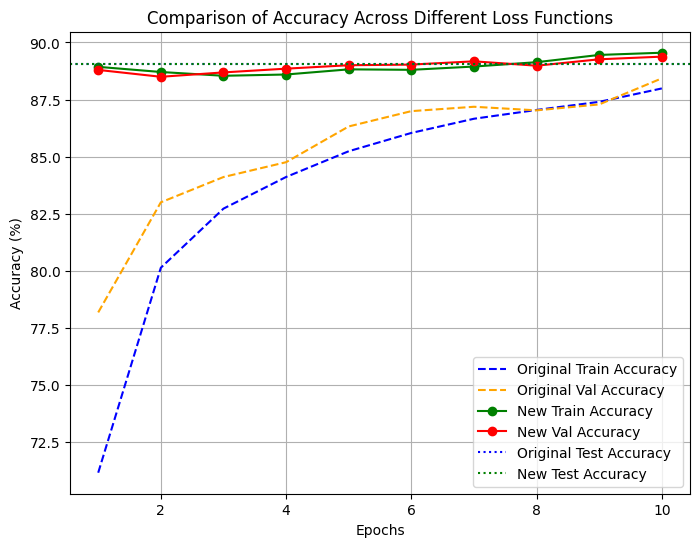

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, num_epochs + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, train_accuracies, label="Original Train Accuracy", linestyle="--", color="blue")
plt.plot(epochs_range, val_accuracies, label="Original Val Accuracy", linestyle="--", color="orange")

plt.plot(epochs_range, alt_train_accuracies, label="New Train Accuracy", marker="o", color="green")
plt.plot(epochs_range, alt_val_accuracies, label="New Val Accuracy", marker="o", color="red")

plt.axhline(y=test_accuracy, color='blue', linestyle='dotted', label="Original Test Accuracy")
plt.axhline(y=best_test_acc, color='green', linestyle='dotted', label="New Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Accuracy Across Different Loss Functions")
plt.legend()
plt.grid(True)
plt.show()


Comparison of Loss Across Different Loss Functions

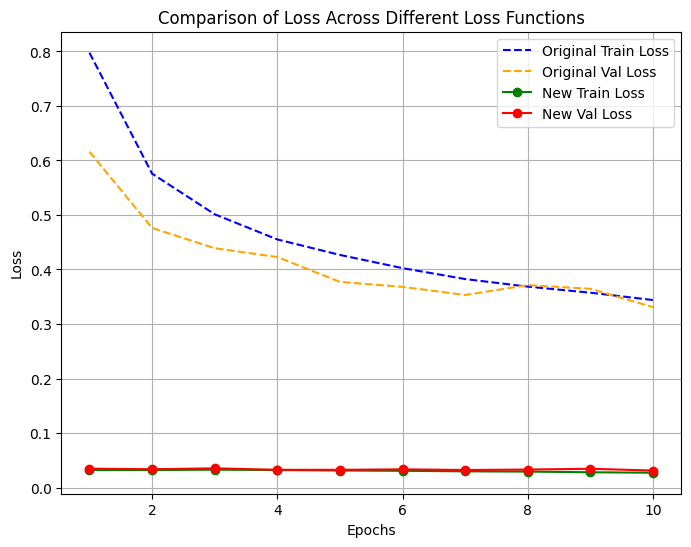

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(epochs_range, train_losses, label="Original Train Loss", linestyle="--", color="blue")
plt.plot(epochs_range, val_losses, label="Original Val Loss", linestyle="--", color="orange")
plt.plot(epochs_range, alt_train_losses, label="New Train Loss", marker="o", color="green")
plt.plot(epochs_range, alt_val_losses, label="New Val Loss", marker="o", color="red")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Loss Across Different Loss Functions")
plt.legend()
plt.grid(True)
plt.show()


 Early Stopping Method

In [ ]:
import time
import torch

patience = 5
best_val_loss = float("inf")
epochs_no_improve = 0

best_train_acc, best_val_acc, best_test_acc = 0, 0, 0
best_train_epoch, best_val_epoch, best_test_epoch = 0, 0, 0

train_accuracies = []
val_accuracies = []
test_accuracies = []
train_losses = []
val_losses = []
test_losses = []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss, correct_train, total_train = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels.argmax(dim=1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_train += (preds == labels.argmax(dim=1)).sum().item()
        total_train += labels.shape[0]

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100

    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss += loss_function(val_outputs, val_labels.argmax(dim=1)).item()

            preds_val = torch.argmax(val_outputs, dim=1)
            correct_val += (preds_val == val_labels.argmax(dim=1)).sum().item()
            total_val += val_labels.shape[0]

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = (correct_val / total_val) * 100

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    test_loss, correct_test, total_test = 0.0, 0, 0
    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
            test_outputs = model(test_inputs)
            test_loss += loss_function(test_outputs, test_labels.argmax(dim=1)).item()

            preds_test = torch.argmax(test_outputs, dim=1)
            correct_test += (preds_test == test_labels.argmax(dim=1)).sum().item()
            total_test += test_labels.shape[0]

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = (correct_test / total_test) * 100

    test_losses.append(avg_test_loss)
    test_accuracies.append(test_accuracy)

    if train_accuracy > best_train_acc:
        best_train_acc, best_train_epoch = train_accuracy, epoch + 1
    if val_accuracy > best_val_acc:
        best_val_acc, best_val_epoch = val_accuracy, epoch + 1
    if test_accuracy > best_test_acc:
        best_test_acc, best_test_epoch = test_accuracy, epoch + 1

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}% - "
          f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}% - "
          f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

end_time = time.time()
print(f"Total Training Time: {end_time - start_time:.2f} seconds")

print(f"Highest Training Accuracy: {best_train_acc:.2f}% (Epoch {best_train_epoch})")
print(f"Highest Validation Accuracy: {best_val_acc:.2f}% (Epoch {best_val_epoch})")
print(f"Highest Test Accuracy: {best_test_acc:.2f}% (Epoch {best_test_epoch})")

torch.save(model.state_dict(), "a0_part_3_babynain_2.pt")
print("Model saved as a0_part_3_babynain_2.pt")

Epoch 1/10 - Training Loss: 0.0240, Training Accuracy: 90.29% - Validation Loss: 0.0324, Validation Accuracy: 89.96% - Test Loss: 0.0337, Test Accuracy: 89.79%
Epoch 2/10 - Training Loss: 0.0235, Training Accuracy: 90.62% - Validation Loss: 0.0334, Validation Accuracy: 89.59% - Test Loss: 0.0359, Test Accuracy: 89.40%
Epoch 3/10 - Training Loss: 0.0230, Training Accuracy: 90.62% - Validation Loss: 0.0360, Validation Accuracy: 89.49% - Test Loss: 0.0379, Test Accuracy: 89.52%
Epoch 4/10 - Training Loss: 0.0230, Training Accuracy: 90.67% - Validation Loss: 0.0335, Validation Accuracy: 89.95% - Test Loss: 0.0349, Test Accuracy: 89.72%
Epoch 5/10 - Training Loss: 0.0228, Training Accuracy: 90.69% - Validation Loss: 0.0334, Validation Accuracy: 89.99% - Test Loss: 0.0346, Test Accuracy: 89.63%
Epoch 6/10 - Training Loss: 0.0222, Training Accuracy: 90.86% - Validation Loss: 0.0341, Validation Accuracy: 89.52% - Test Loss: 0.0356, Test Accuracy: 89.60%
Early stopping triggered at epoch 6
Tota

Training vs Validation vs Test Accuracy

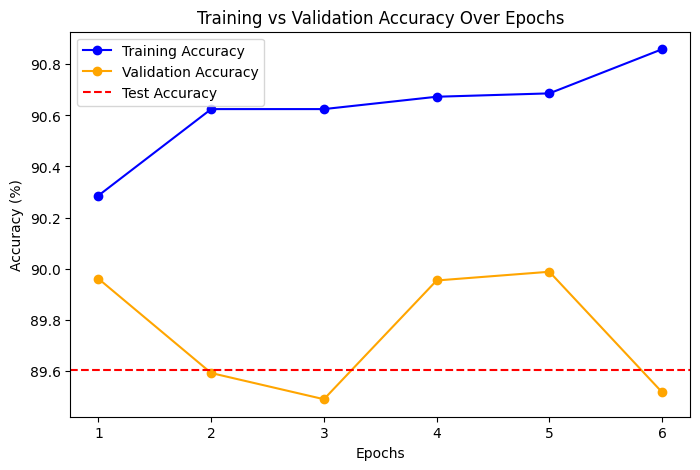

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_accuracies, label="Training Accuracy", marker="o", color="blue")
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy", marker="o", color="orange")

plt.axhline(y=test_accuracies[-1], color='red', linestyle='--', label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy Over Epochs")
plt.legend()
plt.show()


Training vs Validation vs Test Loss

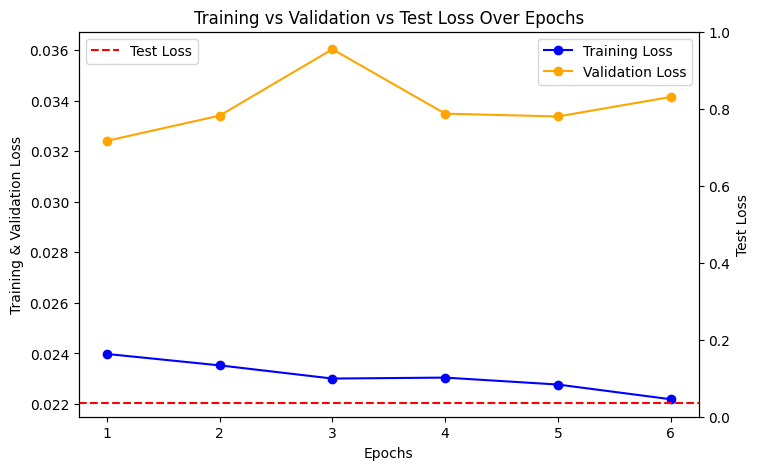

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_losses) + 1)

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(epochs_range, train_losses, label="Training Loss", marker="o", color="blue")
ax1.plot(epochs_range, val_losses, label="Validation Loss", marker="o", color="orange")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training & Validation Loss")
ax1.set_title("Training vs Validation vs Test Loss Over Epochs")
ax1.legend(loc="upper right")

ax2 = ax1.twinx()
ax2.axhline(y=test_losses[-1], color='red', linestyle='--', label="Test Loss")
ax2.set_ylabel("Test Loss")
ax2.legend(loc="upper left")
plt.show()

Confusion Matrix

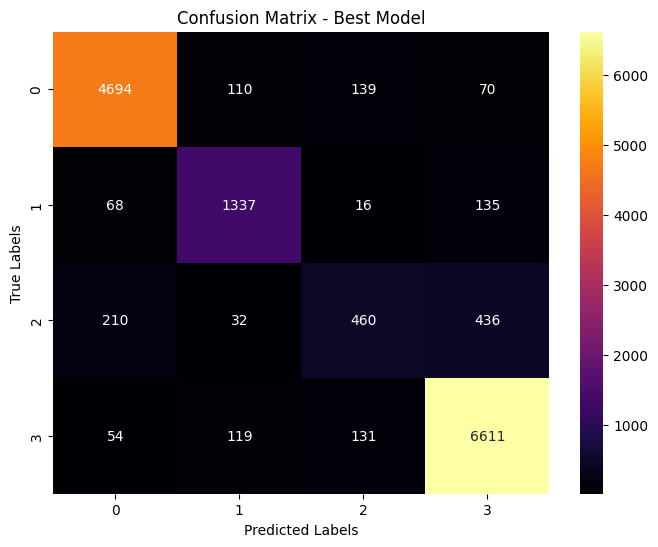

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
        test_outputs = model(test_inputs)
        preds_test = torch.argmax(test_outputs, dim=1)

        y_true.extend(test_labels.argmax(dim=1).cpu().numpy())
        y_pred.extend(preds_test.cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Best Model")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0     0.9339    0.9364    0.9352      5013
           1     0.8367    0.8593    0.8478      1556
           2     0.6166    0.4042    0.4883      1138
           3     0.9116    0.9560    0.9333      6915

    accuracy                         0.8960     14622
   macro avg     0.8247    0.7890    0.8011     14622
weighted avg     0.8883    0.8960    0.8902     14622



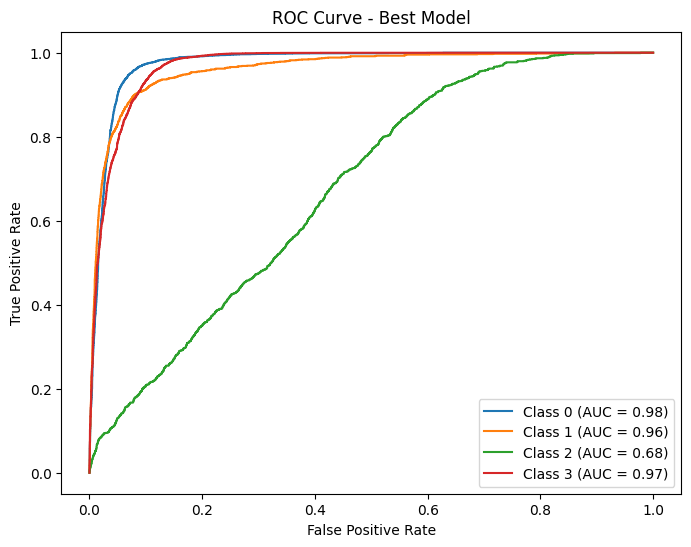

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)
y_score = []

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs = test_inputs.to(device)
        outputs = model(test_inputs)
        y_score.extend(outputs.cpu().numpy())

import numpy as np
num_classes = len(set(y_true))

y_true_one_hot = np.eye(num_classes)[np.array(y_true)]

plt.figure(figsize=(8, 6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], np.array(y_score)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best Model")
plt.legend()
plt.show()


Evaluating this best model on the test data

In [ ]:
import torch

model.eval()
test_loss, correct_test, total_test = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

        test_outputs = model(test_inputs)
        loss = loss_function(test_outputs, test_labels.argmax(dim=1))
        test_loss += loss.item()

        preds = torch.argmax(test_outputs, dim=1)
        correct_test += (preds == test_labels.argmax(dim=1)).sum().item()
        total_test += test_labels.shape[0]

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(test_labels.argmax(dim=1).cpu().numpy())

avg_test_loss = test_loss / len(test_loader)
test_accuracy = (correct_test / total_test) * 100

print(f"\nModel Performance on Test Data:")
print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")



Model Performance on Test Data:
Test Loss: 0.0356
Test Accuracy: 89.60%


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_preds, digits=4)
print("\n Classification Report:")
print(report)


 Classification Report:
              precision    recall  f1-score   support

           0     0.9339    0.9364    0.9352      5013
           1     0.8367    0.8593    0.8478      1556
           2     0.6166    0.4042    0.4883      1138
           3     0.9116    0.9560    0.9333      6915

    accuracy                         0.8960     14622
   macro avg     0.8247    0.7890    0.8011     14622
weighted avg     0.8883    0.8960    0.8902     14622



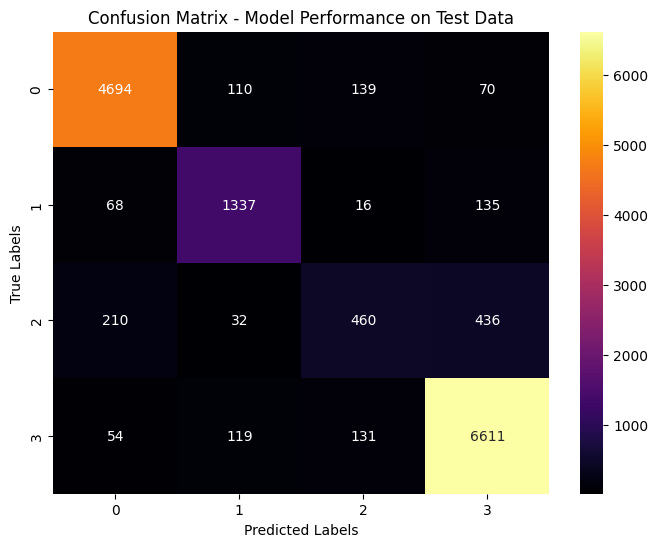

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Model Performance on Test Data")
plt.show()

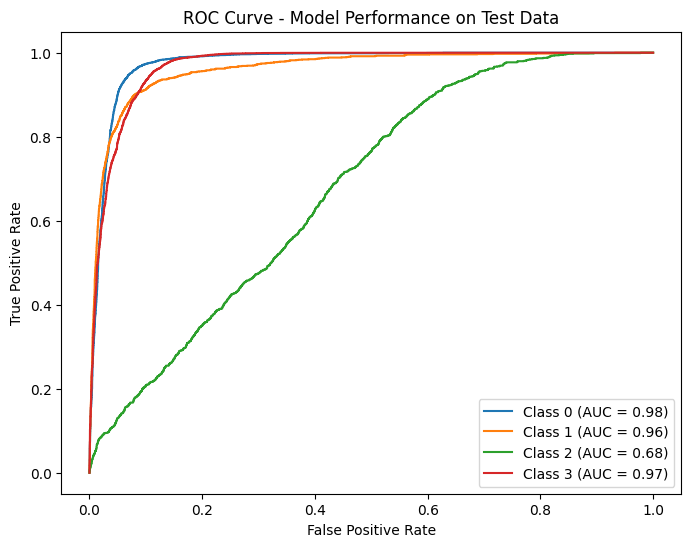

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

num_classes = len(set(all_labels))
y_true_one_hot = np.eye(num_classes)[np.array(all_labels)]

y_score = []
with torch.no_grad():
    for test_inputs, _ in test_loader:
        test_inputs = test_inputs.to(device)
        outputs = model(test_inputs)
        y_score.extend(outputs.cpu().numpy())

plt.figure(figsize=(8, 6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], np.array(y_score)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Performance on Test Data")
plt.legend()
plt.show()


Hence, Early Stopping method performed well on the test data with a remarkable accuracy of 89.6%.

References:

https://pytorch.org/tutorials/beginner/introyt/introyt_index.html

https://medmnist.com/

https://pandas.pydata.org/

https://numpy.org/

https://matplotlib.org/

https://seaborn.pydata.org/

https://scikit-learn.org/stable/

https://scipy.org/

https://www.tensorflow.org/
